In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sl
import networkx as nx
from mlxtend.frequent_patterns import fpgrowth, association_rules, apriori

# Задание 1 «Поиск ассоциативных правил»

#### 1. Загрузите файл «assc_TRANSACTION.csv». В нем три колонки Customer – ID клиента, Product – покупка, Time – временная метка (для задания не нужна). Определите (написав соответствующий код) сколько различных значений принимают переменныеProduct и Customer.

In [17]:
data_original = pd.read_csv('TRANSACTION.csv')
unique_products=len(data_original.PRODUCT.unique())
unique_customers = len(data_original.CUSTOMER.unique())
unique_products,unique_customers

(20, 1001)

#### 2. Найдите частые эпизоды с ограничением на размер правила равным 4, с использованием алгоритма и порога на поддержку согласно вашему варианту. (Вариант 1 Apriori, 2%)

Составим таблицу, где столбцами будет имена продуктов, а строками ID покупателей, в ячейках будут булевы значения с информацией о том покупал человек товар или нет

In [18]:
data = data_original.drop(columns='TIME')
basket = data.pivot_table(index='CUSTOMER', columns='PRODUCT', aggfunc=lambda x: True, fill_value=False)
basket

PRODUCT,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,True,False,False,True,False,True,False,True,True,True,False,False,False,False,True
1,False,False,False,True,False,False,False,False,True,True,False,True,True,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True
3,False,False,False,False,False,True,False,True,False,False,True,False,False,True,True,True,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,False,True,True,False,False,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False
997,True,False,False,True,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True
998,False,False,False,True,False,False,False,False,False,True,False,True,True,False,False,False,True,True,False,False


Отберем частые эпизоды

In [19]:
min_support = 0.02
frequent_itemsets = apriori(basket, min_support=min_support, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.313686,(apples)
1,0.304695,(artichok)
2,0.362637,(avocado)
3,0.391608,(baguette)
4,0.073926,(bordeaux)
...,...,...
1096,0.022977,"(steak, soda, hering, cracker, heineken)"
1097,0.020979,"(baguette, hering, artichok, avocado, heineken..."
1098,0.021978,"(baguette, soda, hering, avocado, cracker, hei..."
1099,0.021978,"(ice_crea, sardines, bourbon, chicken, heineke..."


Отберем правила с размером <=4

In [20]:
frequent_itemsets_len4 = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) <= 4)]
frequent_itemsets_len4

,support,itemsets
0,0.313686,(apples)
1,0.304695,(artichok)
2,0.362637,(avocado)
3,0.391608,(baguette)
4,0.073926,(bordeaux)
...,...,...
1045,0.029970,"(olives, ice_crea, ham, turkey)"
1046,0.042957,"(heineken, soda, olives, hering)"
1047,0.022977,"(heineken, soda, hering, steak)"
1048,0.022977,"(olives, ice_crea, hering, turkey)"


#### 3. Найдите самый большой (где больше всего элементов) частый эпизод, содержащий продукт согласно вашему варианту. Какая у него поддержка? 
Вариант 1 - artichok

In [21]:
filtered_freq = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: 'artichok' in x)]
largest_episode = filtered_freq.loc[filtered_freq['itemsets'].apply(len).idxmax()]
largest_episode['support'],largest_episode['itemsets']

(np.float64(0.02097902097902098),
 frozenset({'apples',
            'artichok',
            'avocado',
            'baguette',
            'heineken',
            'hering'}))

#### 4. На основе найденных частых эпизодов постройте ассоциативные правила с порогом на достоверность согласно вашему варианту. Найдите правило с максимальным лифтом, содержащем продукт из вашего варианта в левой части правила. Дайте ему письменную словесную интерпретацию, укажите и объясните его числовые показатели: поддержку, достоверность и подъем.
50% согласно варианту

Сформируем правило

In [22]:
min_confidence = 0.5
rules_by_conf = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
rules_by_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(apples),(hering),0.313686,0.485514,0.156843,0.500000,1.029835,1.0,0.004544,1.028971,0.042213,0.244168,0.028155,0.411523
1,(apples),(olives),0.313686,0.472527,0.158841,0.506369,1.071619,1.0,0.010616,1.068557,0.097379,0.253185,0.064159,0.421261
2,(steak),(apples),0.226773,0.313686,0.117882,0.519824,1.657145,1.0,0.046746,1.429295,0.512854,0.278960,0.300355,0.447810
3,(artichok),(avocado),0.304695,0.362637,0.210789,0.691803,1.907700,1.0,0.100295,2.068038,0.684317,0.461707,0.516450,0.636535
4,(avocado),(artichok),0.362637,0.304695,0.210789,0.581267,1.907700,1.0,0.100295,1.660497,0.746527,0.461707,0.397771,0.636535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,"(heineken, olives, hering, cracker)","(soda, bourbon)",0.044955,0.154845,0.023976,0.533333,3.444301,1.0,0.017015,1.811046,0.743070,0.136364,0.447833,0.344086
1885,"(soda, bourbon, hering, cracker)","(heineken, olives)",0.037962,0.202797,0.023976,0.631579,3.114338,1.0,0.016277,2.163836,0.705694,0.110599,0.537858,0.374903
1886,"(heineken, soda, bourbon, hering)","(olives, cracker)",0.035964,0.184815,0.023976,0.666667,3.607207,1.0,0.017329,2.445554,0.749741,0.121827,0.591095,0.398198
1887,"(heineken, bourbon, hering, cracker)","(olives, soda)",0.036963,0.164835,0.023976,0.648649,3.935135,1.0,0.017883,2.377008,0.774507,0.134831,0.579303,0.397052


Найдем правило с максимальным лифтомс продуктом artichok

In [23]:
filtered_rbc = rules_by_conf[rules_by_conf['antecedents'].apply(lambda x:'artichok' in x)]
best_rule = filtered_rbc.loc[filtered_rbc['lift'].idxmax()]
best_rule

antecedents                  (artichok, baguette)
consequents           (heineken, avocado, hering)
antecedent support                       0.134865
consequent support                       0.133866
support                                  0.098901
confidence                               0.733333
lift                                     5.478109
representativity                              1.0
leverage                                 0.080847
conviction                               3.248002
zhangs_metric                            0.944888
jaccard                                  0.582353
certainty                                0.692118
kulczynski                                0.73607
Name: 1494, dtype: object

+ Support = 0.098901, это частота, с которой встречаются левая и правая части правила одновременно (A∪B) внутри общего числа транзакция (A∪B/общее число транзакций), то есть в 9.8% корзин содержатся все товары
+ Confidence = 0.733333, это вероятность с которой купят B, при условии покупки A, то есть Support(A∪B)/Support(A), 73% что при покупке (baguette, artichok) купят и (avocado, hering, heineken)
+ Lift = 5.478109, эта величина показывает насколько сильно связаны величины A и B, по сравнению со случайными покупками, lift = 5.5 значит, что вероятность купить (avocado, hering, heineken) при покупке (baguette, artichok) в 5.5 раз выше чем при случаной покупке
-----
 Здесь A (antecedent support) - левая часть правила, B (consequent support) - правая часть правила 

#### 5. Используя только двухместные правила постройте ориентированный граф, где вершины элементы правила, их цвет (или размер) – поддержка элемента (item support), дуги – импликации (ориентированы в направлении от условия к следствию), веса дугu – достоверности.

In [24]:
filtered_rbc_size2 = rules_by_conf[(rules_by_conf['antecedents'].apply(len) == 1) & (rules_by_conf['consequents'].apply(len) == 1)]
filtered_rbc_size2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(apples),(hering),0.313686,0.485514,0.156843,0.500000,1.029835,1.0,0.004544,1.028971,0.042213,0.244168,0.028155,0.411523
1,(apples),(olives),0.313686,0.472527,0.158841,0.506369,1.071619,1.0,0.010616,1.068557,0.097379,0.253185,0.064159,0.421261
2,(steak),(apples),0.226773,0.313686,0.117882,0.519824,1.657145,1.0,0.046746,1.429295,0.512854,0.278960,0.300355,0.447810
3,(artichok),(avocado),0.304695,0.362637,0.210789,0.691803,1.907700,1.0,0.100295,2.068038,0.684317,0.461707,0.516450,0.636535
4,(avocado),(artichok),0.362637,0.304695,0.210789,0.581267,1.907700,1.0,0.100295,1.660497,0.746527,0.461707,0.397771,0.636535
5,(artichok),(cracker),0.304695,0.487512,0.156843,0.514754,1.055879,1.0,0.008300,1.056140,0.076113,0.246855,0.053156,0.418238
6,(artichok),(heineken),0.304695,0.599401,0.251748,0.826230,1.378426,1.0,0.069114,2.305336,0.394841,0.385911,0.566224,0.623115
7,(artichok),(hering),0.304695,0.485514,0.156843,0.514754,1.060224,1.0,0.008909,1.060257,0.081695,0.247634,0.056833,0.418900
8,(baguette),(avocado),0.391608,0.362637,0.214785,0.548469,1.512446,1.0,0.072773,1.411560,0.556910,0.398148,0.291564,0.570378
9,(avocado),(baguette),0.362637,0.391608,0.214785,0.592287,1.512446,1.0,0.072773,1.492204,0.531596,0.398148,0.329850,0.570378


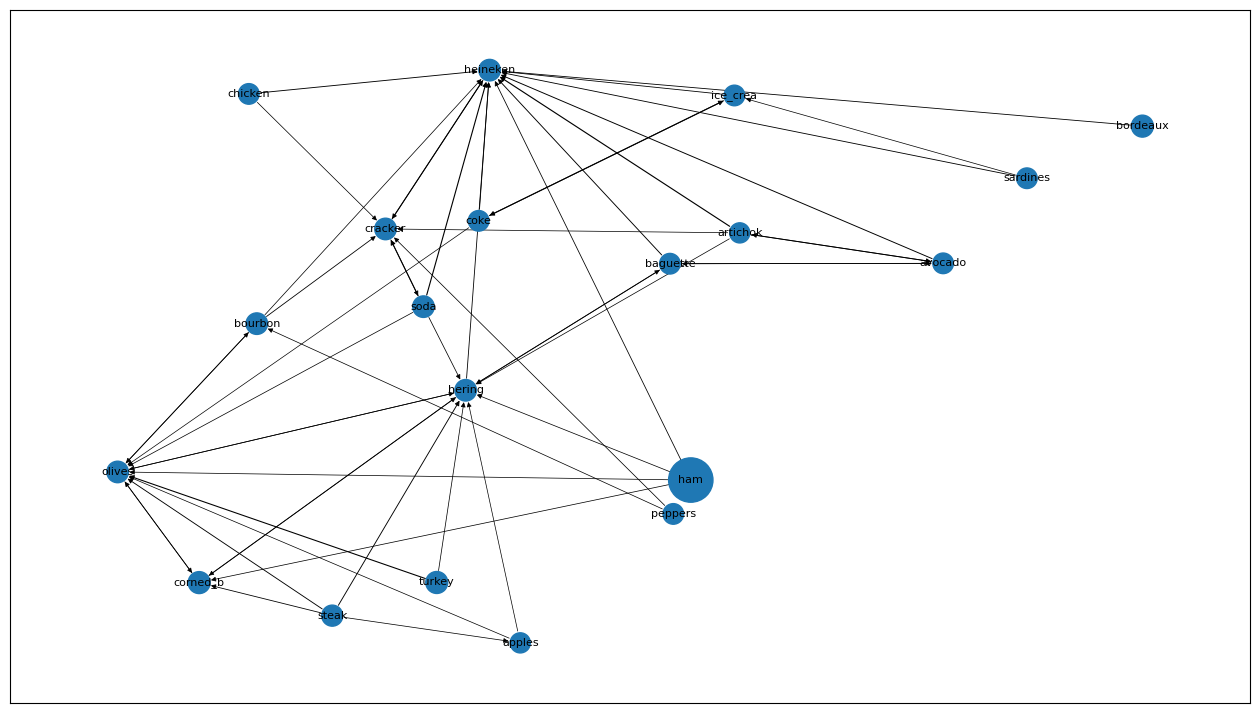

In [25]:
G = nx.DiGraph()
item_support = {item: support for itemset, support in zip(frequent_itemsets['itemsets'], frequent_itemsets['support']) for item in itemset}
for item in item_support:
    G.add_node(item, size=item_support[item] * 10000)
for _, row in filtered_rbc_size2.iterrows():
    A = list(row['antecedents'])[0]
    B = list(row['consequents'])[0]
    confidence = row['confidence']
    G.add_edge(A, B, weight=confidence)
plt.figure(figsize=(16, 9))
pos = nx.spring_layout(G,seed=13)
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
edges = G.edges(data=True)
nx.draw_networkx_nodes(G,pos=pos,node_size=node_sizes)
nx.draw_networkx_edges(G,pos=pos,width=[d['weight'] for (_, _, d) in edges],arrowsize=7)
nx.draw_networkx_labels(G,pos=pos,font_size=8)
plt.show()

#### 6. Для данного графа рассчитайте меры центральности согласно вашему варианту и найдите элемент с самой высокой мерой, а также какую меру имеет продукт из вашего варианта.

Рассчитаем меры центральности для варианта 1 Betweenness

<BarContainer object of 20 artists>

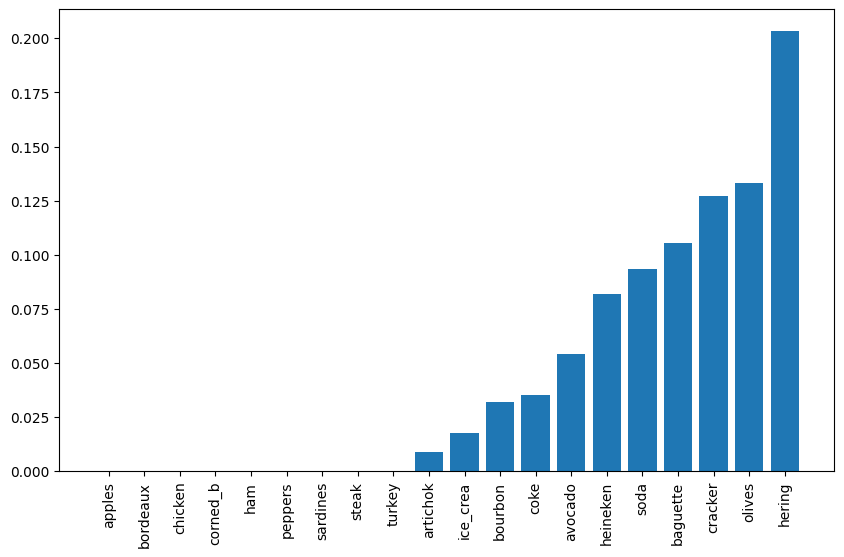

In [26]:
plt.figure(figsize=(10,6))
metr=nx.betweenness_centrality(G)
metr = dict(sorted(metr.items(), key=lambda x: x[1]))
plt.xticks(rotation = 'vertical')
plt.bar(metr.keys(),metr.values())

Найдем меру artichok и максимальную меру

In [27]:
metr['artichok'],list(metr.items())[-1]

(0.008771929824561403, ('hering', 0.20321637426900585))

#### 7. Постройте числовую матрицу со счетчиком числа покупок в ячейках, клиентами по строкам и продуктами по столбцам.

In [28]:
purchase_matrix = data.pivot_table(index='CUSTOMER', columns='PRODUCT', aggfunc='size', fill_value=0)
purchase_matrix

PRODUCT,apples,artichok,avocado,baguette,bordeaux,bourbon,chicken,coke,corned_b,cracker,ham,heineken,hering,ice_crea,olives,peppers,sardines,soda,steak,turkey
CUSTOMER,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0
997,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
998,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,2,1,0,0
